## Imports

In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import re
import itertools

## Function Definitions

In [2]:
def getSoup(url):
    response = requests.get(url)
    if response.status_code == 200:
        return BeautifulSoup(response.text, "html.parser")
    return None

In [28]:
# This function returns a list of lap times performed by Albert on a particular heat
def getAlbertLapTimes(url):
    soup = getSoup(url)
    lapTimeTables = soup.findAll('table', {'class': 'LapTimes'})
    albertLapTimeTable = [item for item in lapTimeTables if item.find('th').text == "Albert"][0]
    albertLapTimeRows = albertLapTimeTable.findAll('tr', {'class': ['LapTimesRowAlt', 'LapTimesRow']})
    albertLapTimesStringList = [item.findAll('td')[1].text[:-3].strip() for item in albertLapTimeRows]
    albertLapTimesList = [float(stringLapTime) for stringLapTime in albertLapTimesStringList if stringLapTime]
    return albertLapTimesList

In [ ]:
def getStatistics(lapTimes):
    import statistics
    d = {}
    d['mean'] = statistics.mean(lapTimes)
    d['bestTime'] = min(lapTimes)
    d['stdev'] = statistics.stdev(lapTimes)
    d['numberLaps'] = len(lapTimes)
    return d;

In [3]:
url = 'https://tirwashington.clubspeedtiming.com/sp_center/'

In [4]:
urlAlbert = url + 'RacerHistory.aspx?CustID=MTIyNDEzNg=='

In [5]:
albertRaceHistorySoup = getSoup(urlAlbert)

In [6]:
raceHistoryRows = albertRaceHistorySoup.findAll('tr', {'class': 'Normal'}) 

In [7]:

kartNumbers = [int(re.findall("\d+",listRow.find('td', {'align':'left'}).text)[0]) for listRow in raceHistoryRows]

In [49]:
dateStrings = [listRow.find('td', {'align': 'center'}).text.strip() for listRow in raceHistoryRows]

In [50]:
dates = [datetime.strptime(dateString, '%m/%d/%Y %I:%M %p') for dateString in dateStrings]

In [37]:
isOutdoorList = ['Outdoor' in listRow.find('td', {'align':'left'}).text for listRow in raceHistoryRows]

In [8]:
listHeatUrlExtensions = [item.find('a').get('href') for item in raceHistoryRows]

In [29]:
listAlbertLapTimes = [getAlbertLapTimes(url + urlExtension) for urlExtension in listHeatUrlExtensions]

In [30]:
listAlbertLapTimes

[[24.962,
  23.991,
  23.519,
  23.229,
  23.213,
  23.11,
  23.763,
  23.949,
  23.249,
  23.41,
  23.058,
  23.44,
  23.53,
  23.485,
  23.482,
  23.211,
  22.976,
  23.338,
  23.699,
  23.219],
 [23.982,
  23.821,
  23.849,
  24.518,
  23.702,
  24.058,
  23.572,
  23.991,
  23.913,
  23.797,
  23.576,
  23.597,
  23.777,
  23.594,
  23.596,
  23.69,
  23.705,
  23.551,
  23.994],
 [23.248,
  23.303,
  23.723,
  22.863,
  22.486,
  22.776,
  22.731,
  22.353,
  22.677,
  22.194,
  22.48,
  22.643,
  22.523,
  22.418,
  22.379,
  22.858,
  22.292,
  22.649,
  22.595,
  22.572,
  22.644],
 [24.553,
  23.28,
  22.757,
  22.658,
  22.589,
  22.742,
  22.756,
  22.801,
  22.196,
  22.678,
  22.816,
  22.534,
  22.808,
  22.921,
  22.784,
  22.457,
  23.004,
  22.519,
  22.591,
  22.614],
 [25.713,
  25.203,
  23.773,
  23.548,
  23.446,
  23.657,
  23.369,
  23.397,
  23.121,
  23.137,
  23.138,
  23.663,
  23.508,
  23.471,
  23.17,
  23.223,
  22.867,
  23.127,
  23.033,
  23.226,
  23

In [69]:
listAlbertStatistics = [getStatistics(lapTimes) for lapTimes in listAlbertLapTimes]

In [70]:
listAlbertStatistics

[{'mean': 23.49165,
  'bestTime': 22.976,
  'stdev': 0.44311033139554973,
  'numberLaps': 20},
 {'mean': 23.804368421052633,
  'bestTime': 23.551,
  'stdev': 0.2386613617954006,
  'numberLaps': 19},
 {'mean': 22.68604761904762,
  'bestTime': 22.194,
  'stdev': 0.3641803778610917,
  'numberLaps': 21},
 {'mean': 22.8029,
  'bestTime': 22.196,
  'stdev': 0.4677635367531223,
  'numberLaps': 20},
 {'mean': 23.48,
  'bestTime': 22.867,
  'stdev': 0.6053776271291923,
  'numberLaps': 29},
 {'mean': 23.843533333333333,
  'bestTime': 23.296,
  'stdev': 0.388377236924256,
  'numberLaps': 30},
 {'mean': 23.619433333333333,
  'bestTime': 23.071,
  'stdev': 0.6912375550208943,
  'numberLaps': 30},
 {'mean': 23.666933333333333,
  'bestTime': 23.163,
  'stdev': 0.4608977696007957,
  'numberLaps': 30},
 {'mean': 23.998733333333334,
  'bestTime': 23.002,
  'stdev': 1.027351967130942,
  'numberLaps': 30},
 {'mean': 24.045,
  'bestTime': 23.234,
  'stdev': 0.9181912775790364,
  'numberLaps': 19},
 {'mean'

In [77]:
listOfRawDataRows = []
for (lapTimes, isOutdoor, date, kartNumber) in zip(listAlbertLapTimes, isOutdoorList, dates, kartNumbers):
    for lapTime in lapTimes:
        d = {}
        d['lapTime'] = lapTime
        d['date'] = date
        d['isOutdoor'] = isOutdoor
        d['kartNumber'] = kartNumber
        listOfRawDataRows.append(d)

In [78]:
listOfRawDataRows

[{'lapTime': 24.962,
  'date': datetime.datetime(2019, 10, 10, 17, 40),
  'isOutdoor': False,
  'kartNumber': 16},
 {'lapTime': 23.991,
  'date': datetime.datetime(2019, 10, 10, 17, 40),
  'isOutdoor': False,
  'kartNumber': 16},
 {'lapTime': 23.519,
  'date': datetime.datetime(2019, 10, 10, 17, 40),
  'isOutdoor': False,
  'kartNumber': 16},
 {'lapTime': 23.229,
  'date': datetime.datetime(2019, 10, 10, 17, 40),
  'isOutdoor': False,
  'kartNumber': 16},
 {'lapTime': 23.213,
  'date': datetime.datetime(2019, 10, 10, 17, 40),
  'isOutdoor': False,
  'kartNumber': 16},
 {'lapTime': 23.11,
  'date': datetime.datetime(2019, 10, 10, 17, 40),
  'isOutdoor': False,
  'kartNumber': 16},
 {'lapTime': 23.763,
  'date': datetime.datetime(2019, 10, 10, 17, 40),
  'isOutdoor': False,
  'kartNumber': 16},
 {'lapTime': 23.949,
  'date': datetime.datetime(2019, 10, 10, 17, 40),
  'isOutdoor': False,
  'kartNumber': 16},
 {'lapTime': 23.249,
  'date': datetime.datetime(2019, 10, 10, 17, 40),
  'isOutd

In [79]:
rawAnalysisDataFrame = pd.DataFrame(listOfRawDataRows)

In [81]:
indoorRawAnalysisDataFrame = rawAnalysisDataFrame[rawAnalysisDataFrame.isOutdoor == False]

In [88]:
indoorRawAnalysisDataFrame.groupby('kartNumber').mean()

,isOutdoor,lapTime
kartNumber,,
1,False,23.843533
2,False,22.743049
10,False,23.876687
11,False,24.486639
16,False,23.484755


It looks like there is an obvious difference in laptimes between different karts, let's do a hypothesis test to find out

## Hypothesis Test 
Ho: Means of laptimes from different kart numbers do not differ
H1: Means of laptimes from different kart numbers do differ

In [95]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [99]:
mod = ols('lapTime ~ kartNumber', data=indoorRawAnalysisDataFrame).fit()

In [100]:
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df          F    PR(>F)
kartNumber    9.116540    1.0  11.742725  0.000702
Residual    218.932515  282.0        NaN       NaN


 Looks like kart number really matters

## Time Series Progression of best times

In [72]:
for (statsdict, isOutdoor, date, kartNumber) in zip(listAlbertStatistics, isOutdoorList, dates, kartNumbers):
    statsdict['isOutdoor'] = isOutdoor
    statsdict['date'] = date
    statsdict['kartNumber'] = kartNumber
    listOfDataRows.append(statsdict)

In [73]:
analysisDataFrame = pd.DataFrame(listOfDataRows)

In [74]:
analysisDataFrame

,bestTime,date,isOutdoor,kartNumber,mean,numberLaps,stdev
0,22.976,2019-10-10 17:40:00,False,16,23.491650,20,0.443110
1,23.551,2019-10-10 17:00:00,False,11,23.804368,19,0.238661
2,22.194,2019-10-03 22:20:00,False,2,22.686048,21,0.364180
3,22.196,2019-10-03 22:10:00,False,2,22.802900,20,0.467764
4,22.867,2019-08-14 23:40:00,False,16,23.480000,29,0.605378
5,23.296,2019-08-14 23:06:00,False,1,23.843533,30,0.388377
6,23.071,2019-08-11 23:10:00,False,10,23.619433,30,0.691238
7,23.163,2019-08-11 22:42:00,False,10,23.666933,30,0.460898
8,23.002,2019-08-11 22:14:00,False,10,23.998733,30,1.027352
9,23.234,2019-08-03 22:10:00,False,10,24.045000,19,0.918191


In [75]:
indoorAnalysisDataFrame = analysisDataFrame[analysisDataFrame.isOutdoor == False]

In [76]:
indoorAnalysisDataFrame

,bestTime,date,isOutdoor,kartNumber,mean,numberLaps,stdev
0,22.976,2019-10-10 17:40:00,False,16,23.491650,20,0.443110
1,23.551,2019-10-10 17:00:00,False,11,23.804368,19,0.238661
2,22.194,2019-10-03 22:20:00,False,2,22.686048,21,0.364180
3,22.196,2019-10-03 22:10:00,False,2,22.802900,20,0.467764
4,22.867,2019-08-14 23:40:00,False,16,23.480000,29,0.605378
5,23.296,2019-08-14 23:06:00,False,1,23.843533,30,0.388377
6,23.071,2019-08-11 23:10:00,False,10,23.619433,30,0.691238
7,23.163,2019-08-11 22:42:00,False,10,23.666933,30,0.460898
8,23.002,2019-08-11 22:14:00,False,10,23.998733,30,1.027352
9,23.234,2019-08-03 22:10:00,False,10,24.045000,19,0.918191


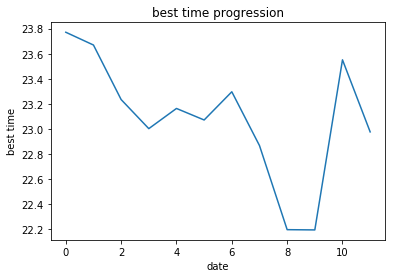

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt 
  
x = [len(indoorAnalysisDataFrame)-i-1 for i in range(len(indoorAnalysisDataFrame))]
y = indoorAnalysisDataFrame['bestTime'] 
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('date') 
# naming the y axis 
plt.ylabel('best time') 
  
# giving a title to my graph 
plt.title('best time progression') 
  
# function to show the plot 
plt.show() 